In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import random
random_seed = 1234
random.seed(random_seed)
np.random.seed(random_seed)

import Functions as f

C:\Users\User\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## File Paths:

In [2]:
womac_path = "../csv/data_training/classify.csv"
features_path = "../csv/data_training/AllFeatures_true.csv"

wdf = f.read_csv_file(womac_path)
fdf = f.read_csv_file(features_path)

fdf.columns = fdf.columns.str.strip()
wdf.columns = wdf.columns.str.strip()

assert 'patient_id' in fdf.columns, "'patient_id' not found in fdf columns"
assert 'patient_id' in wdf.columns, "'patient_id' not found in wdf columns"

fdf.head()
# wdf.head()

,patient_id,swing_time_max,swing_time_min,stance_time_max,stance_time_min,stride_time_max,stride_time_min,setting_angle,mean_hs_angle,mean_to_angle,...,powerY_ 3_C,powerY_ 4_C,powerY_ 5_C,powerY_ 6_C,powerZ_ 1_C,powerZ_ 2_C,powerZ_ 3_C,powerZ_ 4_C,powerZ_ 5_C,powerZ_ 6_C
0,1,1.04,0.46,1.18,0.81,1.99,1.31,71.29,24.000000,38.840000,...,1040.211971,73.481629,141.905164,10.216969,1.571939e+06,607.747259,533.161447,2633.837158,3055.918834,173.842186
1,1,1.22,0.42,1.39,0.08,2.24,0.53,64.05,21.227143,34.982857,...,1964.301772,816.673624,404.261715,228.916362,2.954191e+06,109.416956,2606.851615,10.729508,5185.243035,25.271313
2,1,1.01,0.42,1.01,0.23,2.02,0.65,67.16,17.451667,32.843333,...,4199.071301,3488.940407,113.009892,760.522046,1.902485e+06,860.193745,304.164403,12119.034787,1532.932283,537.452090
3,10,0.90,0.43,0.85,0.52,1.61,1.00,71.26,11.700000,27.365000,...,753.474303,535.838457,105.252777,182.907451,9.738762e+05,2350.306948,2954.338341,2614.545432,1978.834077,105.690189
4,10,0.61,0.36,0.86,0.34,1.43,0.95,69.07,17.008571,28.935714,...,442.169719,431.027909,176.619568,75.768927,1.519685e+06,72.975955,462.167270,1289.025156,711.321877,26.048736


# Preprocessing:

## Merging two Dataframes

In [3]:
merged_df = f.MergeTwoDataFrame(fdf, wdf, "patient_id")
merged_df.to_csv('data_1.csv', index=False)
merged_df.head()

Merged succesfully


,patient_id,swing_time_max,swing_time_min,stance_time_max,stance_time_min,stride_time_max,stride_time_min,setting_angle,mean_hs_angle,mean_to_angle,...,powerZ_ 3_C,powerZ_ 4_C,powerZ_ 5_C,powerZ_ 6_C,name,gender,leg,age,BMI,severity
0,1,1.04,0.46,1.18,0.81,1.99,1.31,71.29,24.000000,38.840000,...,533.161447,2633.837158,3055.918834,173.842186,marwa abdelaly,f,right,40.0,35.755956,mild
1,1,1.22,0.42,1.39,0.08,2.24,0.53,64.05,21.227143,34.982857,...,2606.851615,10.729508,5185.243035,25.271313,marwa abdelaly,f,right,40.0,35.755956,mild
2,1,1.01,0.42,1.01,0.23,2.02,0.65,67.16,17.451667,32.843333,...,304.164403,12119.034787,1532.932283,537.452090,marwa abdelaly,f,right,40.0,35.755956,mild
3,10,0.90,0.43,0.85,0.52,1.61,1.00,71.26,11.700000,27.365000,...,2954.338341,2614.545432,1978.834077,105.690189,rehab helmy,m,right,35.0,29.136316,normal
4,10,0.61,0.36,0.86,0.34,1.43,0.95,69.07,17.008571,28.935714,...,462.167270,1289.025156,711.321877,26.048736,rehab helmy,m,right,35.0,29.136316,normal


## Missing Data Handling

In [4]:
merged_df = f.MissingValueHandling(merged_df)

the columns that contain null values: ['thrustACCel_C', 'thrustACCel_T', 'max_stance_angles', 'age']
Missing values handled


## Encoding Categorical Data:

In [5]:
merged_df = f.Encoding(merged_df)
    
# Check that the value transformed successfully 
print('Severity after Encoding:')
dict(merged_df['severity'].value_counts())

Severity after Encoding:


{2: 33, 3: 21, 0: 16, 1: 14}

## Drop Extra Columns and splitting data from target

In [6]:
merged_df = shuffle(merged_df, random_state = random_seed)

columns_to_drop = ['patient_id', 'name', 'leg', 'severity']

X = merged_df.drop(columns = columns_to_drop, axis = 1)  
y = merged_df['severity']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
X_train.shape

(67, 58)

# Feature Selection

## Filter Method

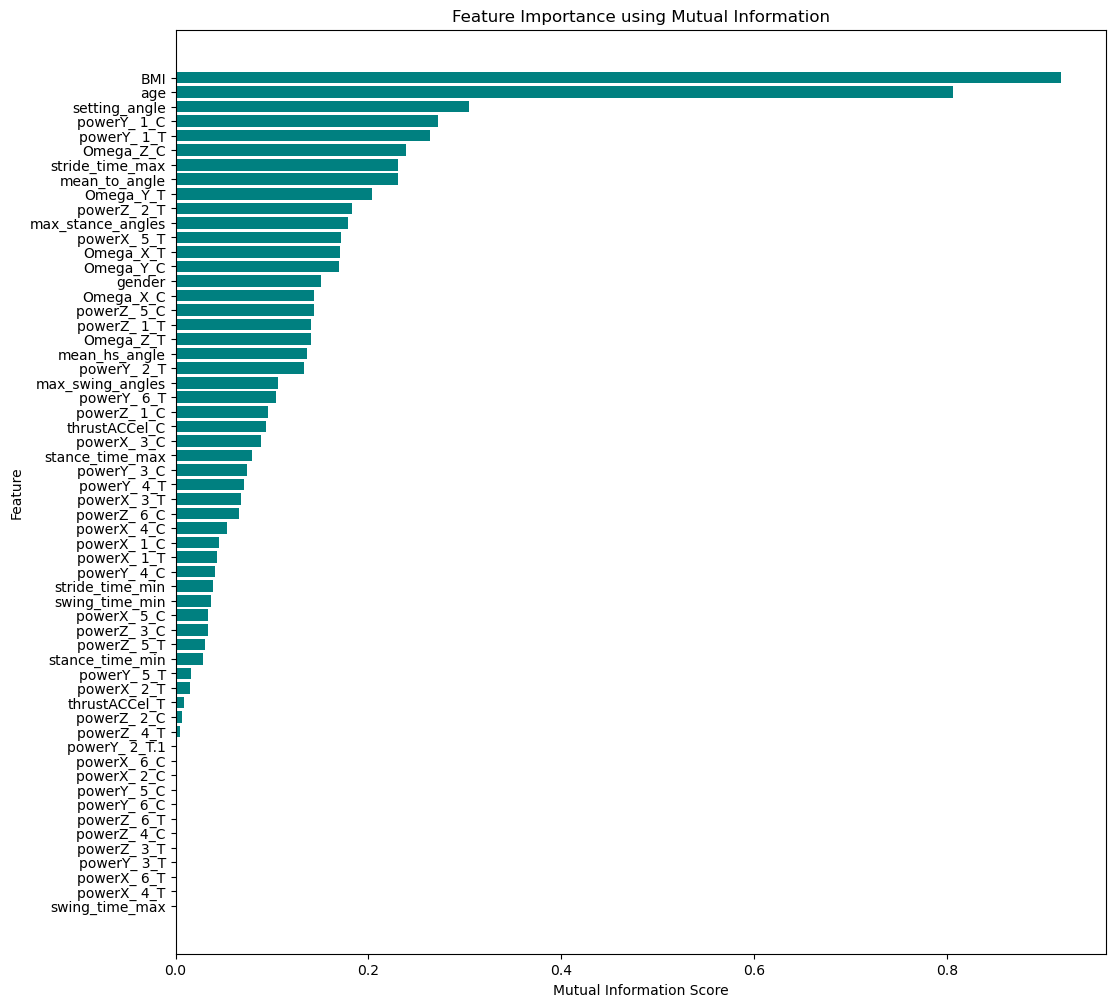

In [7]:
###################################################### Information Gain ######################################################
mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
# Sort features by their mutual information scores
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)
# mi_scores_df

f.PlottingfeatureImportance(mi_scores_df['Feature'], mi_scores_df['MI Score'], 'Mutual Information Score', 'Feature', 'Feature Importance using Mutual Information')

### Drop unselected columns from filter method

In [8]:
X_train_filter, X_test_filter = f.DropAfterFeatureSelection(mi_scores_df, X_train, X_test)
# X_test_filter = X_test.drop(non_selected_features, axis=1)


the droped columns ['swing_time_max', 'powerX_ 4_T', 'powerX_ 6_T', 'powerY_ 3_T', 'powerZ_ 3_T', 'powerZ_ 6_T', 'powerX_ 2_C', 'powerX_ 6_C', 'powerY_ 2_T.1', 'powerY_ 5_C', 'powerY_ 6_C', 'powerZ_ 4_C']


In [9]:
# X_train_filter.columns

# Scaling Data

In [10]:
X_train_filter, X_test_filter = f.ScalingData(X_train_filter, X_test_filter)
X_train, X_test = f.ScalingData(X_train, X_test)

# Model Training

## All Features

In [ ]:
results_all = []
models_all = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

# Train and evaluate each model
for model_name, model in models_all.items():
    y_pred, train_accuracy, test_accuracy, f1, rmse = f.train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test)
    results_all.append((model_name, train_accuracy, test_accuracy, f1, rmse))
    # y_pred = model.predict(X_test)
    # f1 = f1_score(y_test, y_pred, average='weighted')
    # print(f"F1 Score ({model_name}): {f1:.4f}")
    # print('-' * 50)

results_all_df = pd.DataFrame(results_all, columns=['Model', 'train_acc', 'test_acc', 'f1_score', 'RMSE'])
results_all_df

In [ ]:
# clf_all =  RandomForestClassifier(random_state=random_seed)
# clf_all.fit(X_train, y_train)

# y_pred_all_features = clf_all.predict(X_test)

# cmatrix_fun("Rf with ALL features", y_test, y_pred_all_features)

## Over Sampling

In [ ]:
from imblearn.over_sampling  import RandomOverSampler
sampling_strategy = {
    0: 2500,
    1: 2500,
    2: 2500,
    3: 2500
    # Add more classes as needed
}

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Initialize RandomOverSampler with the specified sampling strategy
smoteOver = RandomOverSampler(sampling_strategy=sampling_strategy)
# smoteOver = RandomOverSampler(sampling_strategy=1)
X_smoteOver, y_smoteOver = smoteOver.fit_resample(X_train , y_train)
print(f' X_shape: {X_smoteOver.shape} \n y_shape: {y_smoteOver.shape}')

# Initialize StandardScaler
# scaler_corr = StandardScaler()
# X_train_smote = scaler_corr.fit_transform(X_smoteOver)
# X_test_smote = scaler_corr.transform(X_test)



In [ ]:
results_smote = []
models_sample = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

# Train and evaluate each model
for model_name, model in models_sample.items():
    y_pred, train_accuracy, test_accuracy, f1, rmse = f.train_and_evaluate(model, model_name, X_smoteOver, y_smoteOver, X_test, y_test)
    results_smote.append((model_name, train_accuracy, test_accuracy, f1, rmse))
    # y_pred = model.predict(X_test)
    # f1 = f1_score(y_test, y_pred, average='weighted')
    # print(f"F1 Score ({model_name}): {f1:.4f}")
    # print('-' * 50)

results_smote_df = pd.DataFrame(results_smote, columns=['Model', 'train_acc', 'test_acc', 'f1_score', 'RMSE'])
results_smote_df

In [ ]:
# clf_all =  RandomForestClassifier(random_state=random_seed)
# clf_all.fit(X_smoteOver, y_smoteOver)

# y_pred_sample = clf_all.predict(X_test)

# cmatrix_fun("Rf with ALL features", y_test, y_pred_sample)

## Feature selection training

In [ ]:
results_filter = []
models_filter = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

for model_name, model in models_filter.items():
    y_pred, train_accuracy, test_accuracy, f1, rmse = f.train_and_evaluate(model, model_name, X_train_filter, y_train, X_test_filter, y_test)
    results_filter.append((model_name, train_accuracy, test_accuracy, f1, rmse))
    # y_pred = model.predict(X_test)
    # f1 = f1_score(y_test, y_pred, average='weighted')
    # print(f"F1 Score ({model_name}): {f1:.4f}")
    # print('-' * 50)

results_filter_df = pd.DataFrame(results_filter, columns=['Model', 'train_acc', 'test_acc', 'f1_score', 'RMSE'])  
results_filter_df

In [ ]:
# clf_filter =  RandomForestClassifier(random_state=random_seed)
# clf_filter.fit(X_train_filter, y_train)

# y_pred_filter = clf_filter.predict(X_test_filter)

# cmatrix_fun("Rf with ALL features", y_test, y_pred_filter)

## PCA selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA


selector = RandomForestClassifier(n_estimators=100)
selector.fit(X_train, y_train)  
model_pca = SelectFromModel(selector, prefit=True)
data_selected = model_pca.transform(X_train)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(data_selected)

x1 = model_pca.transform(X_test)
X_test_pca = pca.transform(x1)

In [ ]:
results_pca = []

models_pca = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

for model_name, model in models_pca.items():
    y_pred, train_accuracy, test_accuracy, f1, rmse = f.train_and_evaluate(model, model_name, X_train_pca, y_train, X_test_pca, y_test)
    results_pca.append((model_name, train_accuracy, test_accuracy, f1, rmse))
    # y_pred = model.predict(X_test)
    # f1 = f1_score(y_test, y_pred, average='weighted')
    # print(f"F1 Score ({model_name}): {f1:.4f}")
    # print('-' * 50)

results_pca_df = pd.DataFrame(results_pca, columns=['Model', 'train_acc', 'test_acc', 'f1_score', 'RMSE'])   
results_pca_df

In [ ]:
# clf_pca =  RandomForestClassifier(random_state=random_seed)
# clf_pca.fit(X_train_pca, y_train)

# y_pred_pca = clf_filter.predict(X_test_pca)

# cmatrix_fun("Rf with ALL features", y_test, y_pred_pca)

## PCA on original data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components= 30)  # Example: Retain 10 principal components
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# scatter = plt.scatter(X_pca[:, 10], X_pca[:, 18], c=y, cmap='viridis', edgecolor='k', s=100)

# # Create a legend with a color for each unique value in y
# handles = [plt.Line2D([0,0],[0,0],color=scatter.cmap(scatter.norm(label))) for label in np.unique(y)]
# class_labels = ['normal', 'mild', 'moderate', 'severe']
# plt.legend(handles, class_labels, title='Target', bbox_to_anchor=(1.05, 1))

# # Set plot title and axis labels
# plt.title('PCA Scatter Plot')
# plt.xlabel('PCA Component 2')
# plt.ylabel('PCA Component 4')

# # Add a colorbar with a label
# cbar = plt.colorbar(scatter)
# cbar.set_label('Target')

# # Adjust figure size and layout
# plt.figure(figsize=(20, 20))
# plt.tight_layout()
# plt.savefig('important_img/pca.png', format='png', dpi=300, bbox_inches='tight')
# # Show the plot
# plt.show()


In [ ]:
X_train_pca2, X_test_pca2, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=random_seed)

results_pca2 = []
models_pca2 = {
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Logistic Regression": LogisticRegression(),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "XGBoost": XGBClassifier(),
    "linear SVM": SVC(kernel='linear', random_state=random_seed),
    "Poly SVM": SVC(kernel='poly', random_state=random_seed),
    "rbf SVM": SVC(kernel='rbf', random_state=random_seed),
    "Sigmoid SVM": SVC(kernel= 'sigmoid', random_state=random_seed),
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, random_state=random_seed)
}

for model_name, model in models_pca2.items():
    train_and_evaluate(model, model_name, X_train_pca2, y_train, X_test_pca2, y_test)
    y_pred = model.predict(X_test_pca2)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score ({model_name}): {f1:.4f}")
    print('-' * 50)

for model_name, model in models_pca.items():
    y_pred, train_accuracy, test_accuracy, f1, rmse = f.train_and_evaluate(model, model_name, X_train_pca2, y_train, X_test_pca2, y_test)
    results_pca2.append((model_name, train_accuracy, test_accuracy, f1, rmse))
    # y_pred = model.predict(X_test)
    # f1 = f1_score(y_test, y_pred, average='weighted')
    # print(f"F1 Score ({model_name}): {f1:.4f}")
    # print('-' * 50)

results_pca2_df = pd.DataFrame(results_pca2, columns=['Model', 'train_acc', 'test_acc', 'f1_score', 'RMSE'])   
results_pca2_df

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Example data (replace with your actual data)
# model1_train_acc =  [0.1, 0.1, 0.1]  # Training phase accuracies for model 1
# # model1_val_acc = [0.78, 0.82, 0.80]    # Validation phase accuracies for model 1
# model1_test_acc = [0.71, 0.77, 0.82]   # Test phase accuracies for model 1

# model2_train_acc = [0.1, 0.1, 0.1]  # Training phase accuracies for model 2
# # model2_val_acc = [0.72, 0.76, 0.74]    # Validation phase accuracies for model 2
# model2_test_acc =    [0.82, 0.94, 0.9412]  # Test phase accuracies for model 2

# phases = ['All features', 'Feature Selection', 'Smote upsampling']
# bar_width = 0.3
# index = np.arange(len(phases))

# # Plotting training accuracies
# plt.figure(figsize=(10, 6))
# plt.bar(index - bar_width/2, model1_train_acc, bar_width, label='RF (Train)')
# plt.bar(index + bar_width/2, model2_train_acc, bar_width, label='XGBoost (Train)')

# # # Plotting validation accuracies
# # plt.bar(index - bar_width/2, model1_val_acc, bar_width, label='Model 1 (Validation)', alpha=0.5)
# # plt.bar(index + bar_width/2, model2_val_acc, bar_width, label='Model 2 (Validation)', alpha=0.5)

# # Plotting test accuracies
# plt.bar(index - bar_width/2, model1_test_acc, bar_width, label='RF (Test)', alpha=0.3)
# plt.bar(index + bar_width/2, model2_test_acc, bar_width, label='XGBoost (Test)', alpha=0.3)

# plt.xlabel('Phases')
# plt.ylabel('Accuracy')
# plt.title('Accuracies of RF Model and XGBoost Model across Phases')
# plt.xticks(index, phases)
# plt.legend()
# plt.tight_layout()

# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Example data (replace with your actual data)
# model1_train_acc = [0.1, 0.1, 0.1]   # Training phase accuracies for model 1
# model1_test_acc = [0.71, 0.77, 0.82]  # Test phase accuracies for model 1

# model2_train_acc = [0.1, 0.1, 0.1]    # Training phase accuracies for model 2
# model2_test_acc = [0.82, 0.94, 0.9412] # Test phase accuracies for model 2

# phases = ['All features', 'Feature Selection', 'Smote upsampling']
# index = np.arange(len(phases))

# # Plotting training accuracies as curves
# plt.figure(figsize=(10, 6))
# plt.plot(index, model1_train_acc, marker='o', linestyle='-', color='b', label='RF (Train)')
# plt.plot(index, model2_train_acc, marker='o', linestyle='-', color='g', label='XGBoost (Train)')

# # Plotting test accuracies as curves
# plt.plot(index, model1_test_acc, marker='o', linestyle='-', color='b', alpha=0.5, label='RF (Test)')
# plt.plot(index, model2_test_acc, marker='o', linestyle='-', color='g', alpha=0.5, label='XGBoost (Test)')

# plt.xlabel('Phases')
# plt.ylabel('Accuracy')
# plt.title('Accuracies of RF Model and XGBoost Model across Phases')
# plt.xticks(index, phases)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Example data (replace with your actual data)
# # model1_train_acc = [0.1, 0.1, 0.1]   # Training phase accuracies for model 1
# model1_test_acc = [0.71, 0.77, 0.82]  # Test phase accuracies for model 1

# model2_train_acc = [0.1, 0.1, 0.1]    # Training phase accuracies for model 2
# # model2_test_acc = [0.82, 0.94, 0.9412] # Test phase accuracies for model 2

# phases = ['All features', 'Feature Selection', 'Smote upsampling']
# index = np.arange(len(phases))

# # Calculate differences between accuracies
# train_diff = np.abs(np.array(model1_train_acc) - np.array(model2_train_acc))
# test_diff = np.abs(np.array(model1_test_acc) - np.array(model2_test_acc))

# # Plotting training accuracies as curves with differences
# plt.figure(figsize=(10, 6))

# # Plotting training accuracies
# # plt.plot(index, model1_train_acc, marker='o', linestyle='-', color='b', label='RF (Train)')
# # plt.plot(index, model2_train_acc, marker='o', linestyle='-', color='g', label='XGBoost (Train)')

# # Highlighting differences with filled area plot
# plt.fill_between(index, model1_train_acc, model2_train_acc,  alpha=0.1)

# # Plotting test accuracies as curves with differences
# plt.plot(index, model1_test_acc, marker='o', linestyle='-', color='b', alpha=0.5, label='RF (Test)')
# plt.plot(index, model2_test_acc, marker='o', linestyle='-', color='g', alpha=0.5, label='XGBoost (Test)')

# # Highlighting differences with filled area plot
# # plt.fill_between(index, model1_test_acc, model2_test_acc, color='gray', alpha=0.1)

# plt.xlabel('Phases')
# plt.ylabel('Accuracy')
# plt.title('Accuracies of RF Model and XGBoost Model across Phases')
# plt.xticks(index, phases)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# plt.show()
